In [2]:
import pandas as pd
from datetime import datetime
import pickle
import numpy as np

In [5]:
df = pd.read_pickle('all_book_list.pickle')

In [6]:
#value_counts한 값을 토대로 데이터프레임 생성
df_book_name = df['서명'].value_counts().to_frame(name='count')

In [7]:
#인덱스를 추가하고 기존의 인덱스는 행으로 추가
df_book_name.reset_index(drop=False, inplace=True)

In [8]:
#컬럼명 변경
df_book_name=df_book_name.rename(columns={'index':'bookname'})
df=df.rename(columns={'서명':'bookname'})

In [20]:
df_book_name.to_pickle("book_name.pickle")

In [10]:
df_inner_join = pd.merge(left=df, right=df_book_name, how='left', on= 'bookname')

In [11]:
df_inner_join.to_pickle('all_book_list_counted.pickle')

In [3]:
from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리

In [12]:
df = pd.read_pickle('all_book_list_counted.pickle')

In [21]:
df_book_name['bookname'] = df_book_name['bookname'].str.replace('[^가-힣]', ' ', regex = True)
df_book_name['bookname']

0                               흔한남매    
1                               흔한남매    
2                               흔한남매    
3                               흔한남매    
4                               흔한남매    
                       ...              
149782                월 부마항쟁사   유신체제의 붕괴
149783                 러일전쟁   기원과 개전    
149784    대중문화 트렌드        가장 핫한 트렌드의 최전선
149785                     산악사진   이론과 실제
149786                  그림으로 읽는    연애심리학
Name: bookname, Length: 149787, dtype: object

In [26]:
from konlpy.tag import Okt
from tqdm import tqdm
okt = Okt()
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)

tqdm.pandas()
nouns = df_book_name['bookname'].progress_apply(okt.nouns)
nouns

100%|██████████| 149787/149787 [07:28<00:00, 333.83it/s]


0                                 [남매]
1                                 [남매]
2                                 [남매]
3                                 [남매]
4                                 [남매]
                      ...             
149782          [월, 부마항쟁, 사, 유신체제, 붕괴]
149783                  [러일전쟁, 기원, 개전]
149784    [대중문화, 트렌드, 가장, 핫, 트렌드, 최전선]
149785                [산악, 사진, 이론, 실제]
149786                   [그림, 연애, 심리학]
Name: bookname, Length: 149787, dtype: object

In [27]:
nouns = nouns.explode()
nouns

0          남매
1          남매
2          남매
3          남매
4          남매
         ... 
149785     이론
149785     실제
149786     그림
149786     연애
149786    심리학
Name: bookname, Length: 661292, dtype: object

In [35]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
0,남매,2.0
1,남매,2.0
2,남매,2.0
3,남매,2.0
4,남매,2.0
...,...,...
149785,이론,2.0
149785,실제,2.0
149786,그림,2.0
149786,연애,2.0


In [36]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
21483,이야기,7352
22874,장편소설,5242
19797,우리,4853
1703,과학,4439
17042,아이,3593
...,...,...
21522,이욘,1
1908,교란,1
21524,이용마,1
21525,이용만,1


In [37]:
df_word

,word,count
21483,이야기,7352
22874,장편소설,5242
19797,우리,4853
1703,과학,4439
17042,아이,3593
...,...,...
21522,이욘,1
1908,교란,1
21524,이용마,1
21525,이용만,1


In [38]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'이야기': 7352,
 '장편소설': 5242,
 '우리': 4853,
 '과학': 4439,
 '아이': 3593,
 '세계': 3110,
 '세상': 2995,
 '역사': 2623,
 '엄마': 2588,
 '여행': 2544,
 '가지': 2458,
 '소설': 2386,
 '수학': 2380,
 '비밀': 2361,
 '사람': 2247,
 '마음': 2180,
 '동화': 2049,
 '사랑': 1991,
 '공부': 1946,
 '만화': 1879,
 '시대': 1785,
 '인생': 1727,
 '어린이': 1714,
 '생각': 1579,
 '영어': 1577,
 '교과서': 1497,
 '당신': 1465,
 '모든': 1457,
 '시간': 1427,
 '그림': 1412,
 '한국사': 1351,
 '친구': 1346,
 '미래': 1345,
 '투자': 1283,
 '가장': 1254,
 '시작': 1251,
 '조선': 1224,
 '수업': 1206,
 '학교': 1112,
 '지구': 1109,
 '아빠': 1093,
 '그림책': 1078,
 '초등': 1060,
 '인간': 1059,
 '한국': 1044,
 '동물': 1020,
 '고양이': 992,
 '사회': 977,
 '상식': 949,
 '나라': 949,
 '세계사': 949,
 '우주': 934,
 '최고': 932,
 '시집': 922,
 '경제': 904,
 '선생님': 904,
 '기술': 900,
 '생활': 900,
 '오늘': 893,
 '가족': 888,
 '하루': 886,
 '모험': 882,
 '처음': 862,
 '에세이': 844,
 '마법': 830,
 '전쟁': 822,
 '무엇': 789,
 '학년': 786,
 '사건': 784,
 '일기': 784,
 '철학': 781,
 '습관': 780,
 '대하': 757,
 '진짜': 756,
 '문화': 725,
 '부자': 712,
 '심리학': 710,
 '기적': 704,
 '신화':

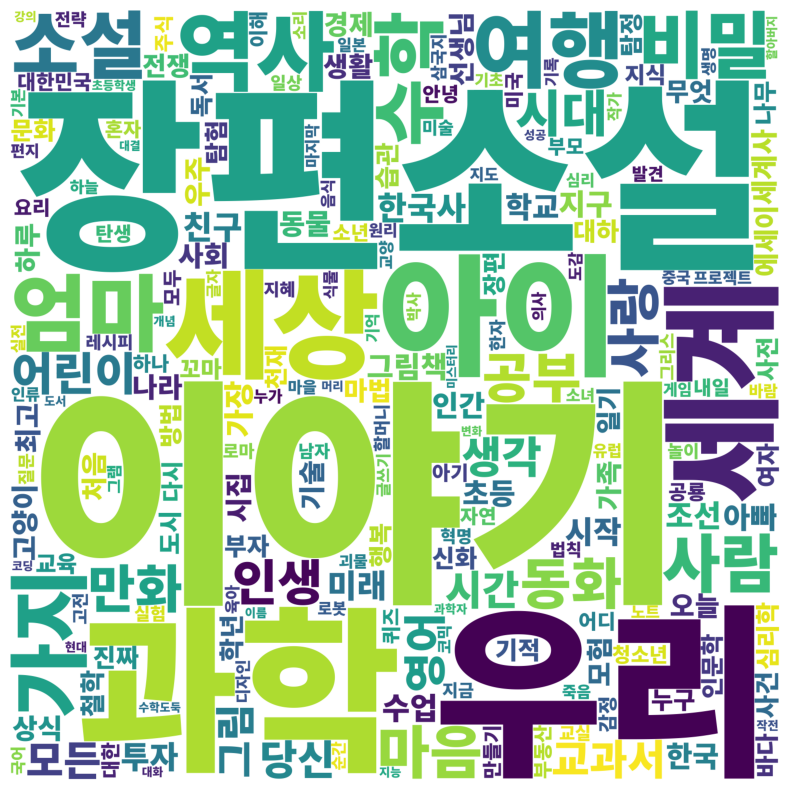

In [45]:
wc = WordCloud(random_state = 123, font_path = '/home/najo/Nas_Codes/library/font/NotoSansKR-Black.ttf', width = 1600,
               height = 1600, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('동감_워드클라우드') # 파일 저장